# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: January 22nd (Monday) 11:00 pm </b> </font>


<font color="blue"> Sai Yesaswy Mylavarapu </font>

# Overview

In this assignment, you are getting familiar to the tools including Python, numpy, matplotlib, pandas, and Jupyter notebook. Search for data one for classification and one for regression from any data source. 
The data should to be large enough more than 10,000 samples and more than 10 feature values. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ---REGRESSION---

# Data

Introduce your data and visualize them. Describe your observations about the data.

## Black Friday Problem

This problem is a part of 'DataHack', an online platform for datascience competitions. 

Dataset can be found here: https://datahack.analyticsvidhya.com/contest/black-friday/

### Introducing Data:

A retail company wants to understand the customer purchase behavior against various products of different categories. The dataset contains various customer demographics and product details of high volume products for one month.

#### Aim is to predict purchase amount of customers against various products. 
Target Variable - Purchase (amount)

Two csv files are provided as a part of the dataset - Train.csv and Test.csv

### Reading data:

Reading the data into jupyter environment using 'Pandas'

In [3]:
train = pd.read_csv('blackfriday/train.csv')
test = pd.read_csv('blackfriday/test.csv')

In [6]:
train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [7]:
train.shape

(550068, 12)

Train dataset contains 550,068 rows of data, with 12 different variables. 

### Data Exploration:

In [8]:
train.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Checking for unique values:

In [30]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

#### Let us now check the categorical variables:

In [12]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [14]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [18]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [22]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Eventhough the 'Occupation' column contains numerical values, ideally they are categorical values encoded in some format.

In [23]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

#### Checking for missing values:

In [16]:
train.apply(lambda x: sum(x.isnull()))

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are a lot of missing values in Product_Category_2 and Product_Category_3 

### Visualizing data:

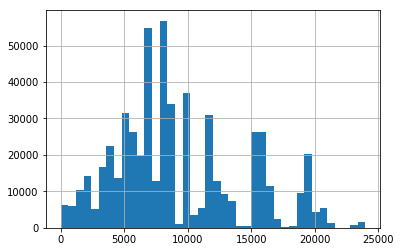

In [28]:
train['Purchase'].hist(bins=40)

By plotting the boxplots of the variables with the target variables, we can find the outliers:

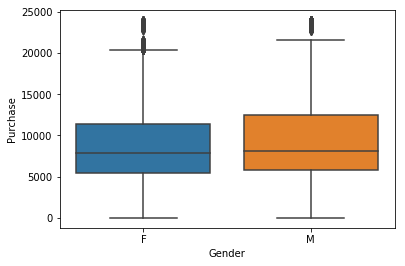

In [36]:
sns.boxplot(x="Gender", y="Purchase", data=train)

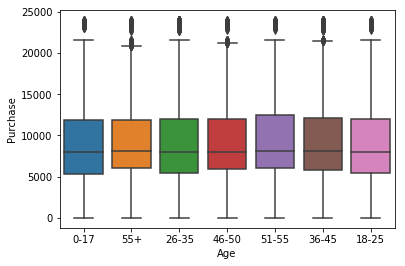

In [40]:
sns.boxplot(x="Age", y="Purchase", data=train)

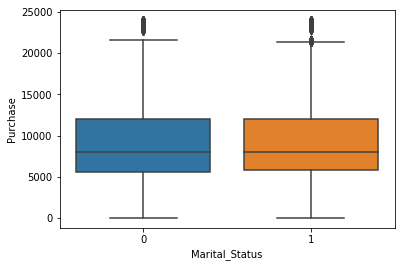

In [41]:
sns.boxplot(x="Marital_Status", y="Purchase", data=train)

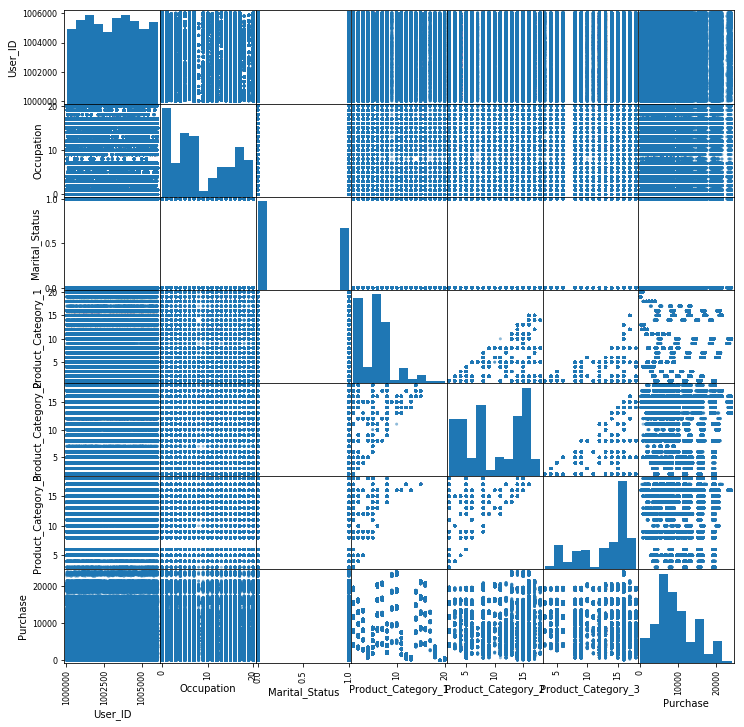

In [31]:
pd.plotting.scatter_matrix(train,figsize=(12,12))
plt.show()

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

The main challenge in this task is that most of the variables are categorical variables. Hence it is required to encode these variables into numerical format to apply Machine learning techniques. 

# ---CLASSIFICATION---

# Data

Introduce your data and visualize them. Describe your observations about the data.

## Default of Credit card clients

This dataset is extracted from UCI Machine learning repository.

Dataset can be found here: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Introducing Data:


#### Aim is to predict the 'default payment' variable - (Yes - 1/No - 0) based on other input variables. 
Target Variable - default payment (Yes-1/No-0) - Binary classification

One excel file is provided as a part of the dataset - default_creditcard.xlsx

### Reading Data:

In [4]:
df = pd.read_excel('default_creditcard.xls')

In [3]:
df.head()

X1   X2         X3        X4   X5     X6     X7     X8     X9  \
ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   

      X10             ...                    X15        X16        X17  \
ID  PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6   
1      -2             ...                      0          0          0   
2       0             ...                   3272       3455       3261   
3       0             ...                  14331      14948      15549   
4       0             ...                  28314      28959      29547   

         X18       X19       X20       X21       X22       X23  \
ID  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   
1          0       689         0         0         0         0   
2          0      1000      1000      1000         0      2000   
3       1518      1500      1000      1000      1000      5000   
4       2000      2019      1200      1100      1069      1000   

                             Y  
ID  default payment next month  
1                            1  
2                            1  
3                            0  
4                            0  

[5 rows x 24 columns]

In [5]:
df.shape

(30001, 24)

In [5]:
df.describe()

X1     X2     X3     X4     X5     X6     X7     X8     X9    X10  \
count   30001  30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique     82      3      8      5     57     12     12     12     12     11   
top     50000      2      2      2     29      0      0      0      0      0   
freq     3365  18112  14030  15964   1605  14737  15730  15764  16455  16947   

        ...      X15    X16    X17    X18    X19    X20    X21    X22    X23  \
count   ...    30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique  ...    21549  21011  20605   7944   7900   7519   6938   6898   6940   
top     ...        0      0      0      0      0      0      0      0      0   
freq    ...     3195   3506   4020   5249   5396   5968   6408   6703   7173   

            Y  
count   30001  
unique      3  
top         0  
freq    23364  

[4 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
X1     30001 non-null object
X2     30001 non-null object
X3     30001 non-null object
X4     30001 non-null object
X5     30001 non-null object
X6     30001 non-null object
X7     30001 non-null object
X8     30001 non-null object
X9     30001 non-null object
X10    30001 non-null object
X11    30001 non-null object
X12    30001 non-null object
X13    30001 non-null object
X14    30001 non-null object
X15    30001 non-null object
X16    30001 non-null object
X17    30001 non-null object
X18    30001 non-null object
X19    30001 non-null object
X20    30001 non-null object
X21    30001 non-null object
X22    30001 non-null object
X23    30001 non-null object
Y      30001 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


### Data Exploration:

#### Checking for unique values:

In [7]:
df.apply(lambda x: len(x.unique()))

X1        82
X2         3
X3         8
X4         5
X5        57
X6        12
X7        12
X8        12
X9        12
X10       11
X11       11
X12    22724
X13    22347
X14    22027
X15    21549
X16    21011
X17    20605
X18     7944
X19     7900
X20     7519
X21     6938
X22     6898
X23     6940
Y          3
dtype: int64

#### Let us now check the categorical variables:

In [8]:
df['X2'].value_counts()

2      18112
1      11888
SEX        1
Name: X2, dtype: int64

In [9]:
df['X3'].value_counts()

2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
EDUCATION        1
Name: X3, dtype: int64

In [11]:
df['X4'].value_counts()

2           15964
1           13659
3             323
0              54
MARRIAGE        1
Name: X4, dtype: int64

#### Checking for missing values:

In [12]:
df.apply(lambda x: sum(x.isnull()))

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

#### Let us plot the histograms of the continuous variables: 

#### Histogram of Limit_bal

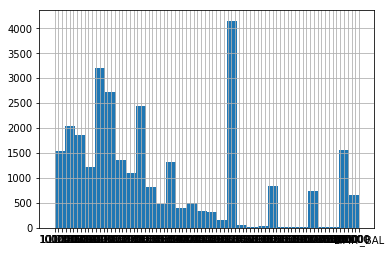

In [16]:
df['X1'].hist(bins=30)

#### Histogram of Age

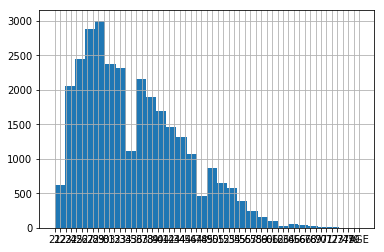

In [20]:
df['X5'].hist(bins=30)

In [45]:
df = df.iloc[1:]

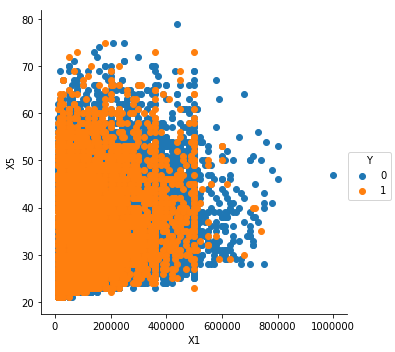

In [48]:
sns.FacetGrid(df, hue="Y", size=5) \
   .map(plt.scatter, "X1", "X5") \
   .add_legend()

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

This dataset seems to be preprocessed, as there are no strings in the categorical variables. All the categorical variables are encoded into digits, in order to facilitate the Machine learning model.  

# References

List your references here... 

Regression dataset: https://datahack.analyticsvidhya.com/contest/black-friday/

Classification Dataset : http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data | 
 | 5| Introduction of data for regression
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 5| Introduction of data for Classification 
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 

